<a href="https://colab.research.google.com/github/JuhyeongKi/Section1_project/blob/main/Copy_of_n211a_simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [122]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [123]:
df_corr = df.corrwith(df['price'])
df_corr.sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
dtype: float64

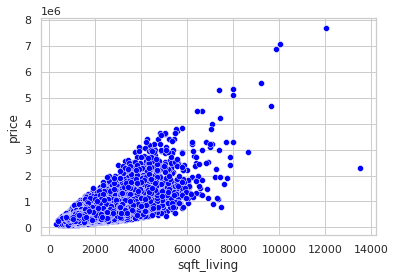

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

x=df['sqft_living']
y=df['price']

sns.scatterplot(x=x, y=y, color='blue');

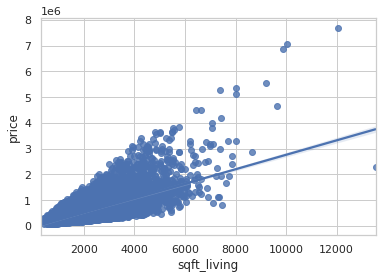

In [125]:
sns.set(style='whitegrid', context='notebook')
sns.regplot(x=df['sqft_living'], y=df['price']);

### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

In [126]:
## predict1 : 우리가 정한 기준모델인 평균으로 예측을 합니다
predict1 = df['price'].mean()


In [127]:
## 평균값으로 예측을 진행할 때 (샘플 - 평균값) -> error 를 저장함.

errors1 = predict1 - df['price']

In [128]:
errors1

0        318188.141767
1          2088.141767
2        360088.141767
3        -63911.858233
4         30088.141767
             ...      
21608    180088.141767
21609    140088.141767
21610    137987.141767
21611    140088.141767
21612    215088.141767
Name: price, Length: 21613, dtype: float64

In [129]:
mean_absolute_errors1 = errors1.abs().mean()

In [130]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [131]:
df['grade'].isnull().sum()

0

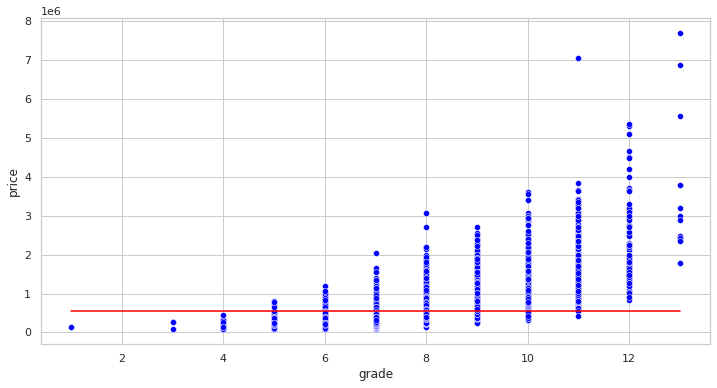

In [132]:
### 이곳에서 과제를 진행해 주세요 ###
# grade 와 price 의 scatterplot 그림
x1 = df['grade']
y1 = df['price']

plt.figure(figsize=(12,6))
sns.lineplot(x=x1, y=predict1, color='red')
sns.scatterplot(x=x1, y=y1, color='blue');

In [133]:
print(f'예측한 주택 가격이 ${predict1:,.0f}이며 절대평균에러가 ${mean_absolute_errors1:,.0f}임을 확인할 수 있습니다.')

예측한 주택 가격이 $540,088이며 절대평균에러가 $233,942임을 확인할 수 있습니다.


### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

In [134]:
### 이곳에서 과제를 진행해 주세요 ###
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [135]:
## X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['grade']
target = ['price']
X_train = df[feature]
y_train = df[target]

In [136]:
## 모델을 학습(fit)합니다
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
X_test = [[6]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} <-grade별 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

6 <-grade별 가지는 주택의 예상 가격은 $194700 입니다.


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [138]:
### 이곳에서 과제를 진행해 주세요 ###
## 전체 테스트 데이터를 모델을 통해 예측해 봅니다.
X_test1 = [[x] for x in df['grade']]
y_pred1 = model.predict(X_test1)

y_pred1

array([[403157.96019888],
       [403157.96019888],
       [194700.3977405 ],
       ...,
       [403157.96019888],
       [611615.52265726],
       [403157.96019888]])

In [139]:
## 계수(coefficient)
model.coef_

array([[208457.56245838]])

In [140]:
## 절편(intercept)
model.intercept_

array([-1056044.97700977])

In [141]:
def explain_prediction(grade):
    y_pred10 = model.predict([[grade]])
    pred = f"{int(grade)} <- grade별 주택 가격 예측: ${int(y_pred10[0])} (1 grade당 추가금: ${int(model.coef_[0])})"

    return pred

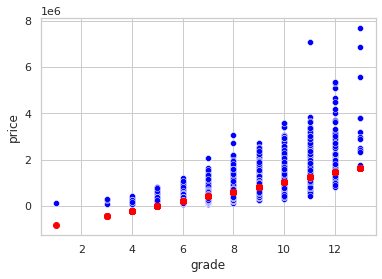

In [142]:
sns.scatterplot(x=x1, y=y1, color='blue')
plt.scatter(X_test1, y_pred1, color='red')

In [143]:
## grade = 10 인 테스트 데이터로 예측
print(explain_prediction(10))

10 <- grade별 주택 가격 예측: $1028530 (1 grade당 추가금: $208457)


### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [156]:
### 이곳에서 과제를 진행해 주세요 ###
model2 = LinearRegression()

feature = ['sqft_living']
target = ['price']
x_train_sqft = df[feature]
y_train_sqft = df[target]


In [157]:
## 모델을 학습(fit)합니다
model2.fit(x_train_sqft, y_train_sqft)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
x_test_sqft = [[x] for x in df['sqft_living']]
y_pred_sqft = model2.predict(x_test_sqft)
y_pred_sqft

array([[287555.06702451],
       [677621.82640197],
       [172499.40418656],
       ...,
       [242655.29616092],
       [405416.96554144],
       [242655.29616092]])

In [163]:
model2.coef_

array([[280.6235679]])

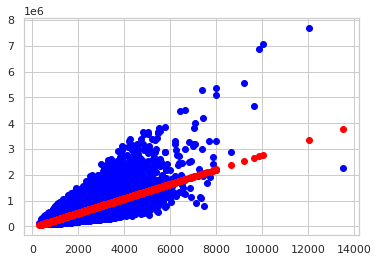

In [162]:
plt.scatter(x=x_train_sqft, y=y_train_sqft, color='blue')
plt.scatter(x=x_test_sqft, y=y_pred_sqft, color='red')

## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###